<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Practice Lab: Data Wrangling**


# Objectives

After completing this lab you will be able to:

 - Handle missing data in different ways
 - Correct the data type of different data values as per requirement
 - Standardize and normalize the appropriate data attributes
 - Visualize the data as grouped bar graph using Binning
 - Cnverting a categorical data into numerical indicator variables


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [62]:
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns


In [63]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath, header=None)

Verify loading by displaying the dataframe summary using `dataframe.info()`


In [64]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float64
 1   1       239 non-null    object 
 2   2       239 non-null    object 
 3   3       239 non-null    object 
 4   4       239 non-null    object 
 5   5       239 non-null    object 
 6   6       239 non-null    object 
 7   7       235 non-null    object 
 8   8       239 non-null    object 
 9   9       239 non-null    object 
 10  10      239 non-null    object 
 11  11      234 non-null    object 
 12  12      239 non-null    object 
dtypes: float64(1), object(12)
memory usage: 24.4+ KB
None


View the first 5 values of the updated dataframe using `dataframe.head()`


In [65]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,1.0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
3,2.0,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
4,3.0,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244


In [66]:
df.shape

(239, 13)

In [67]:
df = df.drop(0, axis=0)
df = df.drop(0, axis=1)

In [68]:
# Write your code below and press Shift+Enter to execute.
headers = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", 
           "Screen_Size_cm", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]

df.columns = headers

In [69]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
3,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
4,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
5,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 1 to 238
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Manufacturer    238 non-null    object
 1   Category        238 non-null    object
 2   Screen          238 non-null    object
 3   GPU             238 non-null    object
 4   OS              238 non-null    object
 5   CPU_core        238 non-null    object
 6   Screen_Size_cm  234 non-null    object
 7   CPU_frequency   238 non-null    object
 8   RAM_GB          238 non-null    object
 9   Storage_GB_SSD  238 non-null    object
 10  Weight_kg       233 non-null    object
 11  Price           238 non-null    object
dtypes: object(12)
memory usage: 22.4+ KB


In [71]:
df.shape

(238, 12)

Note that we can update the `Screen_Size_cm` column such that all values are rounded to nearest 2 decimal places by using `numpy.round()`


In [72]:

df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head(10)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.2,634
3,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.2,946
4,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
5,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837
6,Dell,3,Full HD,1,1,5,39.62,1.6,8,256,2.2,1016
7,HP,3,Full HD,3,1,5,39.62,1.6,8,256,2.1,1117
8,Acer,3,IPS Panel,2,1,5,38.10,1.6,4,256,2.2,866
9,Dell,3,Full HD,1,1,5,39.62,2.5,4,256,2.3,812
10,Acer,3,IPS Panel,3,1,7,38.10,1.8,8,256,2.2,1068


# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data. 


In [73]:
df['Category'] = df['Category'].astype(object)
df['GPU'] = df['GPU'].astype(int)
df['OS'] = df['OS'].astype(object)
df['CPU_core'] = df['CPU_core'].astype(int)
df['CPU_frequency'] = df['CPU_frequency'].astype(float)
df['RAM_GB'] = df['RAM_GB'].astype(int)
df['Storage_GB_SSD'] = df['Storage_GB_SSD'].astype(int)
df['Weight_kg'] = df['Weight_kg'].astype(float)
df['Price'] = df['Price'].astype(float)

In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 1 to 238
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    object 
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int32  
 4   OS              238 non-null    object 
 5   CPU_core        238 non-null    int32  
 6   Screen_Size_cm  234 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int32  
 9   Storage_GB_SSD  238 non-null    int32  
 10  Weight_kg       233 non-null    float64
 11  Price           238 non-null    float64
dtypes: float64(4), int32(4), object(4)
memory usage: 18.7+ KB


In [75]:
# Write your code below and press Shift+Enter to execute 

df.isnull().sum()  # check for nan

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

# Task - 2

### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.


In [76]:
df.describe()

,GPU,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,2.151261,5.630252,37.267863,2.360084,7.882353,245.781513,1.862232,1462.344538
std,0.638282,1.241787,2.970222,0.411393,2.482603,34.765316,0.494332,574.607699
min,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,2.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,2.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,3.000000,7.000000,39.620000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,3.000000,7.000000,43.940000,2.900000,16.000000,256.000000,3.600000,3810.000000


In [77]:
# Write your code below and press Shift+Enter to execute
df['Weight_kg'] = df['Weight_kg'].fillna(df['Weight_kg'].mean())

In [78]:
df.isnull().sum()[df.isnull().sum() > 0 ]

Screen_Size_cm    4
dtype: int64

### Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.


In [79]:
# Write your code below and press Shift+Enter to execute

df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(object)

In [80]:
df['Screen_Size_cm'].describe()

count     234.00
unique      9.00
top        39.62
freq       89.00
Name: Screen_Size_cm, dtype: float64

In [81]:
# screen_size_freq = df['Screen_Size_cm'].mode()[0]

screen_size_freq = df['Screen_Size_cm'].describe().top

df['Screen_Size_cm'] = df['Screen_Size_cm'].fillna(screen_size_freq)

In [82]:
df.isnull().sum()[df.isnull().sum() > 0 ]

Series([], dtype: int64)

In [83]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [84]:
# Write your code below and press Shift+Enter to execute
df['Weight_kg'] = df['Weight_kg'].astype(float)
df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)


# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [85]:
# Write your code below and press Shift+Enter to execute

df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54

# changing its name to with inch
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

In [86]:
df['Weight_kg'] = df['Weight_kg']/2.205

# changing its name to with inch
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

In [87]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
1,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,0.725624,978.0
2,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,0.997732,634.0
3,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,0.997732,946.0
4,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,0.553288,1244.0
5,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,0.866213,837.0


In [88]:
df[['Screen_Size_inch', 'Weight_pounds']].describe()


,Screen_Size_inch,Weight_pounds
count,238.000000,238.000000
mean,14.687951,0.844550
std,1.165589,0.221809
min,12.000000,0.367347
25%,14.000000,0.667800
50%,15.000000,0.844550
75%,15.598425,0.997732
max,17.299213,1.632653


### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [89]:
df.CPU_frequency.describe()

count    238.000000
mean       2.360084
std        0.411393
min        1.200000
25%        2.000000
50%        2.500000
75%        2.700000
max        2.900000
Name: CPU_frequency, dtype: float64

In [90]:
# Write your code below and press Shift+Enter to execute
df.CPU_frequency = df.CPU_frequency.astype(object)
df.CPU_frequency.describe()


count     238.0
unique     11.0
top         2.5
freq       71.0
Name: CPU_frequency, dtype: float64

In [91]:
df.CPU_frequency = df.CPU_frequency.astype(float)

In [92]:
df['CPU_frequency'].min(), df['CPU_frequency'].max()

(1.2, 2.9)

In [93]:
df['CPU_frequency'] = (df['CPU_frequency'].max()-df['CPU_frequency'])/(df['CPU_frequency'].max()-df['CPU_frequency'].min())

In [94]:
df['CPU_frequency'].min(), df['CPU_frequency'].max()

(0.0, 1.0)

In [95]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
1,Acer,4,IPS Panel,2,1,5,14.000000,0.764706,8,256,0.725624,978.0
2,Dell,3,Full HD,1,1,3,15.598425,0.529412,4,256,0.997732,634.0
3,Dell,3,Full HD,1,1,7,15.598425,0.117647,8,256,0.997732,946.0
4,Dell,4,IPS Panel,2,1,5,13.299213,0.764706,8,128,0.553288,1244.0
5,HP,4,Full HD,2,1,7,15.598425,0.647059,8,256,0.866213,837.0


# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [96]:
# Write your code below and press Shift+Enter to execute
group_names = ['Low', 'Medium', 'High']
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
bins


array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [97]:
# Write your code below and press Shift+Enter to execute
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
df[['Price','Price-binned']].head(20)

,Price,Price-binned
1,978.0,Low
2,634.0,Low
3,946.0,Low
4,1244.0,Low
5,837.0,Low
6,1016.0,Low
7,1117.0,Low
8,866.0,Low
9,812.0,Low
10,1068.0,Low


In [98]:
df[['Price','Price-binned']].describe(include= 'all')

,Price,Price-binned
count,238.000000,238
unique,NaN,3
top,NaN,Low
freq,NaN,160
mean,1462.344538,NaN
std,574.607699,NaN
min,527.000000,NaN
25%,1066.500000,NaN
50%,1333.000000,NaN
75%,1777.000000,NaN


In [99]:
df['Price-binned'].value_counts()

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64

Also, plot the bar graph of these bins.


Text(0.5, 1.0, 'Price bins')

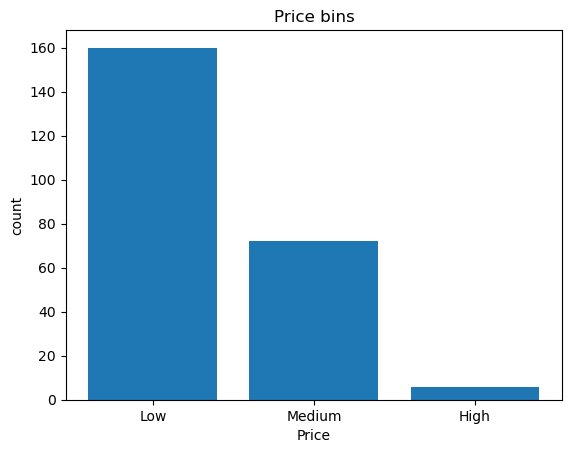

In [100]:
pyplot.bar(group_names, df["Price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

In [101]:
# another way
# bins = df["Price"].quantile([0, 0.33, 0.66, 1]).values
# bins

In [102]:
# Write your code below and press Shift+Enter to execute
# df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
# df[['Price','Price-binned']].head(20)

In [103]:
# df[['Price','Price-binned']].describe(include= 'all')

In [104]:
# df['Price-binned'].value_counts()


Also, plot the bar graph of these bins.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Price-binned', ylabel='count'>

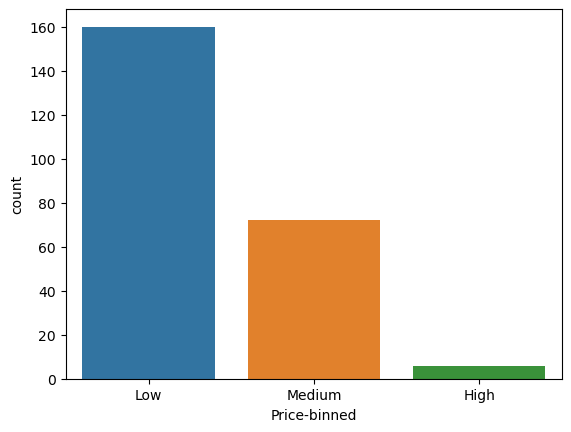

In [105]:
sns.countplot(x="Price-binned", data=df)

# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [106]:
# Write your code below and press Shift+Enter to execute
df['Screen'].value_counts()

Screen
Full HD      161
IPS Panel     77
Name: count, dtype: int64

In [107]:
df['Screen'] = df['Screen'].replace(to_replace= 'IPS Panel', value= 'Screen-IPS_panel')
df['Screen'] = df['Screen'].replace(to_replace= 'Full HD', value= 'Screen-Full_HD')
df['Screen'].value_counts()

Screen
Screen-Full_HD      161
Screen-IPS_panel     77
Name: count, dtype: int64

In [108]:
dummy_variable_1 = pd.get_dummies(df["Screen"]).astype(int)
dummy_variable_1.head()


,Screen-Full_HD,Screen-IPS_panel
1,0,1
2,1,0
3,1,0
4,0,1
5,1,0


In [109]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

In [110]:
df.drop("Screen", axis = 1, inplace=True)

This version of the dataset, now finalized, is the one you'll be using in all subsequent modules. 


Print the content of dataframe.head() to verify the changes that were made to the dataset.


In [111]:
df.head(10)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
1,Acer,4,2,1,5,14.000000,0.764706,8,256,0.725624,978.0,Low,0,1
2,Dell,3,1,1,3,15.598425,0.529412,4,256,0.997732,634.0,Low,1,0
3,Dell,3,1,1,7,15.598425,0.117647,8,256,0.997732,946.0,Low,1,0
4,Dell,4,2,1,5,13.299213,0.764706,8,128,0.553288,1244.0,Low,0,1
5,HP,4,2,1,7,15.598425,0.647059,8,256,0.866213,837.0,Low,1,0
6,Dell,3,1,1,5,15.598425,0.764706,8,256,0.997732,1016.0,Low,1,0
7,HP,3,3,1,5,15.598425,0.764706,8,256,0.952381,1117.0,Low,1,0
8,Acer,3,2,1,5,15.000000,0.764706,4,256,0.997732,866.0,Low,0,1
9,Dell,3,1,1,5,15.598425,0.235294,4,256,1.043084,812.0,Low,1,0
10,Acer,3,3,1,7,15.000000,0.647059,8,256,0.997732,1068.0,Low,0,1


In [114]:
# saving our df to csv file
df.to_csv('clean_df_of_Laptop_Pricing.csv', index=False)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 1 to 238
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Manufacturer      238 non-null    object  
 1   Category          238 non-null    object  
 2   GPU               238 non-null    int32   
 3   OS                238 non-null    object  
 4   CPU_core          238 non-null    int32   
 5   Screen_Size_inch  238 non-null    float64 
 6   CPU_frequency     238 non-null    float64 
 7   RAM_GB            238 non-null    int32   
 8   Storage_GB_SSD    238 non-null    int32   
 9   Weight_pounds     238 non-null    float64 
 10  Price             238 non-null    float64 
 11  Price-binned      238 non-null    category
 12  Screen-Full_HD    238 non-null    int32   
 13  Screen-IPS_panel  238 non-null    int32   
dtypes: category(1), float64(4), int32(6), object(3)
memory usage: 19.1+ KB
